<img src="./logo.png">

# Dataload & Pre-setting

## Import Package

In [1]:
# Data handling
import pandas as pd
import numpy as np

# Warnings
import warnings
warnings.filterwarnings(action='ignore')

# Processing Date
import datetime as dt 
from dateutil.rrule import rrule, YEARLY, MONTHLY, WEEKLY

# Data visualization
import matplotlib.pyplot as plt
plt.rc('font', family='Gothic') # For Windows. Korean font -> 플롯 만드는 창에 넣어야 됨.

plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False # unicode (-)
plt.rcParams['font.size'] = 15
# plt.figure(figsize=(12,4)) # plot 12:4

import seaborn as sns
sns.set() # seaborn : gray grid
sns.set(rc={'figure.figsize':(18, 5)}) # figure size

In [2]:
# sklearn : model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GridSearchCV

In [3]:
# sklearn : regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

from sklearn.svm import SVC

from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

# sklearn : regression scoring
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer

In [4]:
# sklearn : scaler
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

## Dataload

In [5]:
df=pd.read_csv("./dataset/train.csv")

In [6]:
test=pd.read_csv("./dataset/test.csv")

In [7]:
sub=pd.read_csv("./dataset/sample_submission.csv")

<pre>
OverallQual : 전반적 재료와 마감 품질  -> all_auql
GrLivArea : 지상층 생활 면적           -> gr_sf
ExterQual : 외관 재료 품질             -> ex_qual
GarageCars: 차고 자리 개수             -> gara_cars
GarageArea: 차고 면적                  -> gara_sf
KitchenQual : 부억 품질                -> kit_qual
TotalBsmtSF : 지하실 면적              -> bsmt_sf
1stFlrSF : 1층 면적                    -> 1st_sf
BsmtQual : 지하실 높이                 -> bsmt_qual
FullBath : 지상층 화장실 개수          -> full_bath
YearBuilt : 완공 연도                  -> year_built
YearRemodAdd : 리모델링 연도           -> year_remod
GarageYrBlt : 차고 완공 연도           -> year_gara_blt
target : 집값(달러 단위)               -> target

## Change columns name

In [8]:
df.columns=[col.lower() for col in df.columns]
test.columns=[col.lower() for col in test.columns]

In [9]:
col_list=['id','all_qual','gr_sf','ex_qual', 'gara_cars','gara_sf','kit_qual','bsmt_sf','1st_sf','bsmt_qual','full_bath','year_built','year_remod','year_gara_blt','target']
df.columns=col_list
test.columns=col_list[:-1]

In [10]:
df.head()

,id,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250
1,2,7,1352,Gd,2,466,Gd,1352,1352,Ex,2,2006,2007,2006,194000
2,3,5,900,TA,1,288,TA,864,900,TA,1,1967,1967,1967,123000
3,4,5,1174,TA,2,576,Gd,680,680,TA,1,1900,2006,2000,135000
4,5,7,1958,Gd,3,936,Gd,1026,1026,Gd,2,2005,2005,2005,250000


In [11]:
df.shape

(1350, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             1350 non-null   int64 
 1   all_qual       1350 non-null   int64 
 2   gr_sf          1350 non-null   int64 
 3   ex_qual        1350 non-null   object
 4   gara_cars      1350 non-null   int64 
 5   gara_sf        1350 non-null   int64 
 6   kit_qual       1350 non-null   object
 7   bsmt_sf        1350 non-null   int64 
 8   1st_sf         1350 non-null   int64 
 9   bsmt_qual      1350 non-null   object
 10  full_bath      1350 non-null   int64 
 11  year_built     1350 non-null   int64 
 12  year_remod     1350 non-null   int64 
 13  year_gara_blt  1350 non-null   int64 
 14  target         1350 non-null   int64 
dtypes: int64(12), object(3)
memory usage: 158.3+ KB


In [13]:
df.head(1)

,id,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
0,1,10,2392,Ex,3,968,Ex,2392,2392,Ex,2,2003,2003,2003,386250


#### ToDo: there is no null data / object: Exter Qual, Kitchen Qual, Bsmt Qual

## function

### scoring

In [14]:
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score

### split & fit & scoring

In [15]:
# def reg_fit_score(data):
#     y=data['target']
#     X=data.drop('target', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
#     model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
#     score_list=[]
    
#     f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
#     for i, model in enumerate(model_list):
#         model.fit(X_train, y_train)
#         # print(X.columns)
#         # print(model.coef_)
        
#         axs[i].set_title(model.__class__.__name__)
#         sns.barplot(x=model.coef_, y=X.columns, ax=axs[i])
        
#         pred=model.predict(X_test)
#         score=NMAE(y_test, pred)
#         score_list.append(score)
        
#         # print(f"{model.__class__.__name__}:\n\t{fst_score[model.__class__.__name__]} ---> {score:.6f}")
#     return score_list

In [16]:
# def tree_fit_score(data):
#     y=data['target']
#     X=data.drop('target', axis=1)
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1024)
#     model_list = [XGBRegressor(),LGBMRegressor()]    
#     score_list=[]
    
#     f, axs = plt.subplots(1,2, figsize=(16,4))
    
#     for i, model in enumerate(model_list):
#         model.fit(X_train, y_train)
#         #print(model.feature_importances_)
        
#         axs[i].set_title(model.__class__.__name__)
#         sns.barplot(y=X.columns, x=model.feature_importances_, ax=axs[i])
            
#         pred=model.predict(X_test)
#         score=NMAE(y_test, pred)
#         score_list.append(score)
        
#         # print(f"{model.__class__.__name__}:\n\t{fst_score[model.__class__.__name__]} ---> {score:.6f}")
#     return score_list

In [17]:
def reg_fit_score(data):
    y=data['target']
    X=data.drop('target', axis=1)
    model_list=[LinearRegression(),Lasso(),ElasticNet(),Ridge()]
    score_list=[]
    
    f, axs = plt.subplots(1, 4, figsize=(18, 4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_coef_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=NMAE(y_test, pred)
            fold_score_list.append(score)
            
            fold_coef_array[j,]=model.coef_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_coef_=fold_coef_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_coef_, y=X.columns, ax=axs[i])
    
    return score_list

In [18]:
def tree_fit_score(data):
    y=data['target']
    X=data.drop('target', axis=1)
    model_list = [XGBRegressor(),LGBMRegressor()]    
    score_list=[]
    
    f, axs = plt.subplots(1,2, figsize=(16,4))
    
    # -------- loop model
    for i, model in enumerate(model_list):
        
        # -------- KFold
        kfold = KFold(n_splits=3, shuffle=True, random_state=1024)
        fold_score_list = []
        fold_importance_array=np.zeros((3, X.shape[1]))
        
        j=0
        
        for train_index, test_index  in kfold.split(X, y) :
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            
            model.fit(X_train, y_train)
            pred = model.predict(X_test)
            
            score=NMAE(y_test, pred)
            fold_score_list.append(score)
            
            fold_importance_array[j,]=model.feature_importances_
            j=j+1
        
        # -------- score
        mean_score=np.array(fold_score_list).mean()
        score_list.append(mean_score)

        # -------- barplot        
        mean_impo_=fold_importance_array.mean(axis=0)
        
        axs[i].set_title(model.__class__.__name__)
        sns.barplot(x=mean_impo_, y=X.columns, ax=axs[i])
    
    return score_list

In [19]:
# empty score dataframe
index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
sco_df=pd.DataFrame(index=index_list)

# fit & score & make score dataframe
def fit_score(data, trial_name, DF=True):
    
    reg_score_list=reg_fit_score(data)
    tree_score_list=tree_fit_score(data)
    score_list=reg_score_list+tree_score_list
    
    index_list=['LinearRegression()','Lasso()','ElasticNet()','Ridge()', 'XGBRegressor()','LGBMRegressor()']
    score_series=pd.Series(score_list, index=index_list, name=trial_name)
    
    if DF==True:
        global sco_df
        sco_df=pd.concat([sco_df, score_series], axis=1)
        sco_df
    else:
        print(score_series)
    

# EDA

## unique

In [20]:
df.nunique()

id               1350
all_qual            9
gr_sf             813
ex_qual             4
gara_cars           5
gara_sf           454
kit_qual            4
bsmt_sf           709
1st_sf            736
bsmt_qual           5
full_bath           5
year_built        105
year_remod         61
year_gara_blt      97
target            619
dtype: int64

In [21]:
test.nunique()

id               1350
all_qual            9
gr_sf             846
ex_qual             4
gara_cars           4
gara_sf           435
kit_qual            5
bsmt_sf           731
1st_sf            759
bsmt_qual           5
full_bath           5
year_built        108
year_remod         61
year_gara_blt      99
dtype: int64

In [22]:
# unique columns drop
df=df.drop('id', axis=1)
test=test.drop('id', axis=1)

In [23]:
df.nunique()[df.nunique()<=105]

all_qual           9
ex_qual            4
gara_cars          5
kit_qual           4
bsmt_qual          5
full_bath          5
year_built       105
year_remod        61
year_gara_blt     97
dtype: int64

In [24]:
test.nunique()[df.nunique()<=105]

all_qual           9
ex_qual            4
gara_cars          4
kit_qual           5
bsmt_qual          5
full_bath          5
year_built       108
year_remod        61
year_gara_blt     99
dtype: int64

In [25]:
for col in df.nunique()[df.nunique()<=105].index:
    print(f"<{col}>\n\t{np.sort(df[col].unique())}")

<all_qual>
	[ 2  3  4  5  6  7  8  9 10]
<ex_qual>
	['Ex' 'Fa' 'Gd' 'TA']
<gara_cars>
	[1 2 3 4 5]
<kit_qual>
	['Ex' 'Fa' 'Gd' 'TA']
<bsmt_qual>
	['Ex' 'Fa' 'Gd' 'Po' 'TA']
<full_bath>
	[0 1 2 3 4]
<year_built>
	[1880 1882 1885 1890 1892 1893 1900 1908 1910 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942 1945 1946 1947
 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961
 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975
 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010]
<year_remod>
	[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1

In [26]:
for col in test.nunique()[df.nunique()<=105].index:
    print(f"<{col}>\n\t{np.sort(test[col].unique())}")

<all_qual>
	[ 2  3  4  5  6  7  8  9 10]
<ex_qual>
	['Ex' 'Fa' 'Gd' 'TA']
<gara_cars>
	[1 2 3 4]
<kit_qual>
	['Ex' 'Fa' 'Gd' 'Po' 'TA']
<bsmt_qual>
	['Ex' 'Fa' 'Gd' 'Po' 'TA']
<full_bath>
	[0 1 2 3 4]
<year_built>
	[1879 1880 1890 1892 1895 1896 1898 1900 1901 1904 1905 1906 1908 1910
 1912 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1934 1935 1936 1937 1938 1939 1940 1941 1942
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010]
<year_remod>
	[1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 199

<img src='https://cdn-images-1.medium.com/max/430/1*1mnPIiqtP6NVpf5xxYSe7Q.png'>

#### ToDo: Qualitative variables -> ordinal

In [27]:
df.loc[:,df.nunique()>=105].head()

,gr_sf,gara_sf,bsmt_sf,1st_sf,year_built,target
0,2392,968,2392,2392,2003,386250
1,1352,466,1352,1352,2006,194000
2,900,288,864,900,1967,123000
3,1174,576,680,680,1900,135000
4,1958,936,1026,1026,2005,250000


## describe & destribution

In [28]:
df.describe()

,all_qual,gr_sf,gara_cars,gara_sf,bsmt_sf,1st_sf,full_bath,year_built,year_remod,year_gara_blt,target
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.208889,1513.542222,1.870370,502.014815,1082.644444,1167.474074,1.560741,1972.987407,1985.099259,1978.471852,186406.312593
std,1.338015,487.523239,0.652483,191.389956,384.067713,375.061407,0.551646,29.307257,20.153244,25.377278,78435.424758
min,2.000000,480.000000,1.000000,100.000000,105.000000,480.000000,0.000000,1880.000000,1950.000000,1900.000000,12789.000000
25%,5.000000,1144.000000,1.000000,368.000000,816.000000,886.250000,1.000000,1955.000000,1968.000000,1961.000000,135000.000000
50%,6.000000,1445.500000,2.000000,484.000000,1009.000000,1092.500000,2.000000,1976.000000,1993.000000,1978.500000,165375.000000
75%,7.000000,1774.500000,2.000000,588.000000,1309.500000,1396.500000,2.000000,2002.000000,2004.000000,2002.000000,217875.000000
max,10.000000,4476.000000,5.000000,1488.000000,2660.000000,2898.000000,4.000000,2010.000000,2010.000000,2207.000000,745000.000000


In [29]:
test.describe()

,all_qual,gr_sf,gara_cars,gara_sf,bsmt_sf,1st_sf,full_bath,year_built,year_remod,year_gara_blt
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,6.237037,1524.071111,1.871852,499.867407,1101.222222,1175.714815,1.597778,1973.537778,1985.258519,1978.457037
std,1.370057,514.410852,0.651639,186.267579,431.641042,406.858231,0.549002,29.799448,20.818442,25.771750
min,2.000000,407.000000,1.000000,160.000000,173.000000,407.000000,0.000000,1879.000000,1950.000000,1895.000000
25%,5.000000,1169.750000,1.000000,365.250000,825.250000,887.250000,1.000000,1956.000000,1966.000000,1961.000000
50%,6.000000,1472.500000,2.000000,484.000000,1024.000000,1098.000000,2.000000,1976.000000,1995.000000,1982.000000
75%,7.000000,1742.250000,2.000000,578.750000,1338.750000,1409.500000,2.000000,2002.000000,2004.000000,2002.000000
max,10.000000,5642.000000,4.000000,1418.000000,6110.000000,5095.000000,4.000000,2010.000000,2010.000000,2010.000000


In [30]:
col_list=df.select_dtypes(include='object').columns.tolist()
df[col_list].describe()

,ex_qual,kit_qual,bsmt_qual
count,1350,1350,1350
unique,4,4,5
top,TA,TA,TA
freq,808,660,605


In [31]:
col_list=test.select_dtypes(include='object').columns.tolist()
test[col_list].describe()

,ex_qual,kit_qual,bsmt_qual
count,1350,1350,1350
unique,4,5,5
top,TA,TA,Gd
freq,794,666,597


In [32]:
df[df['year_gara_blt']>2200]

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
254,8,1564,Gd,2,502,Ex,1546,1564,Gd,2,2006,2007,2207,267300


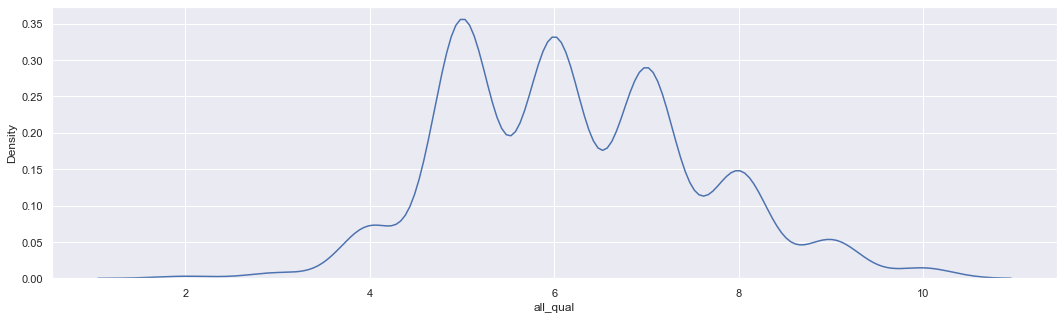

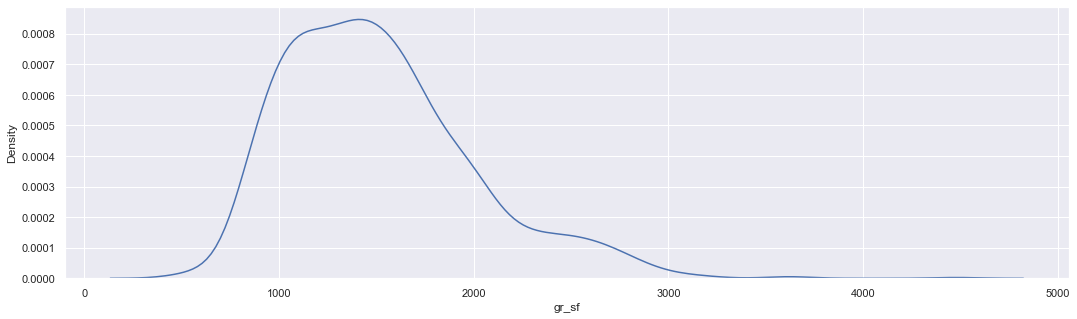

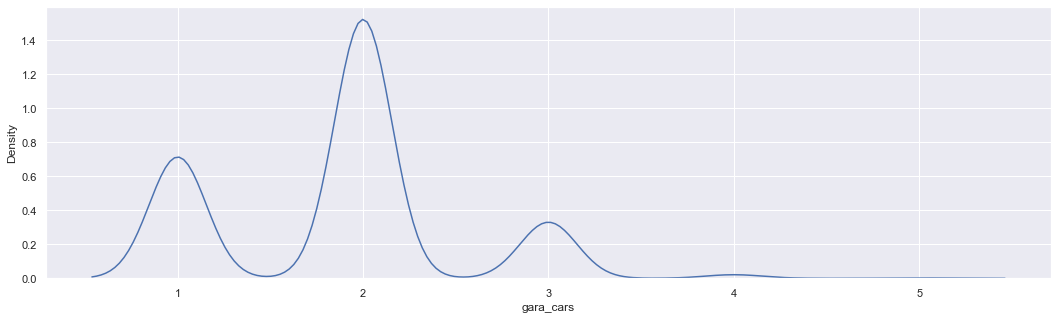

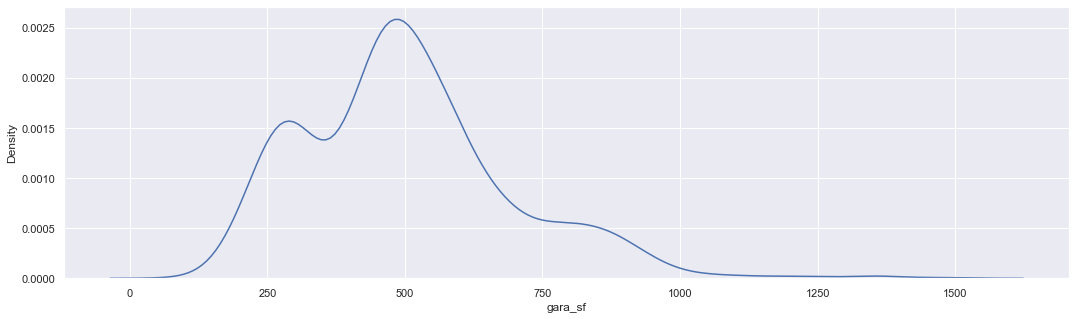

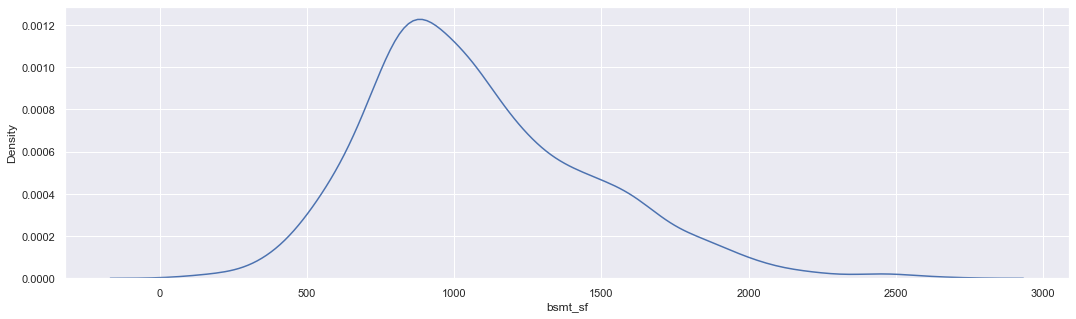

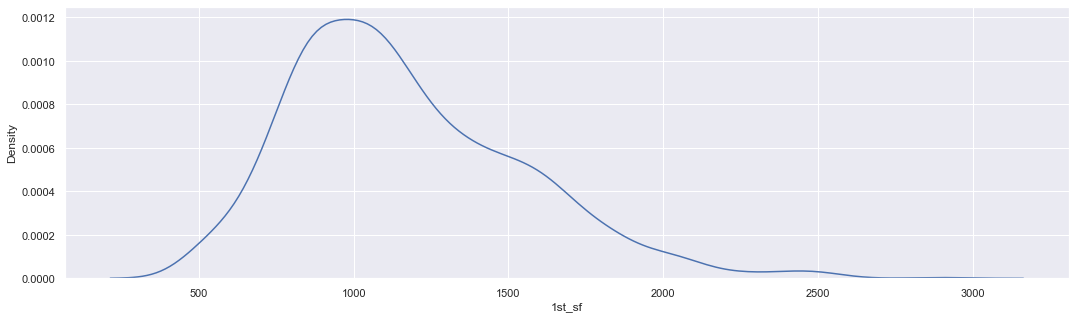

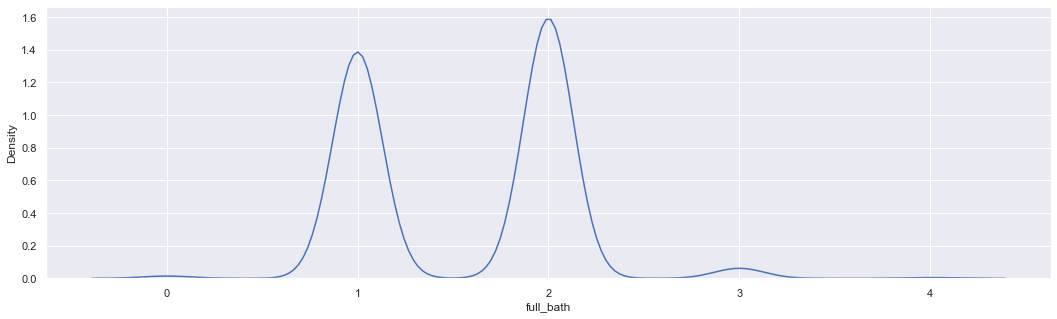

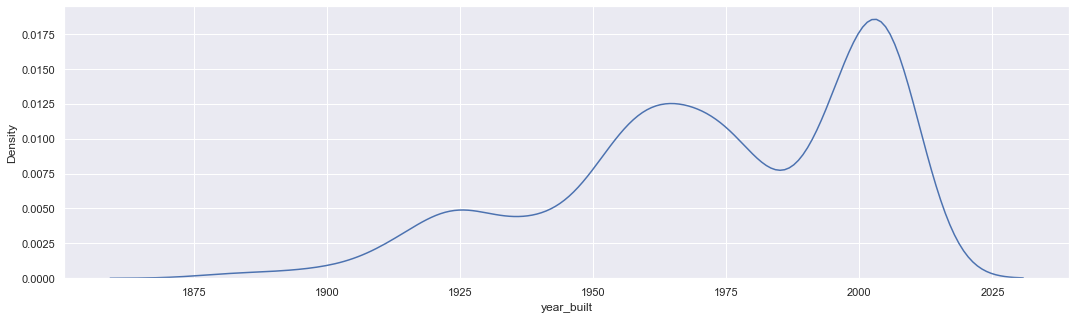

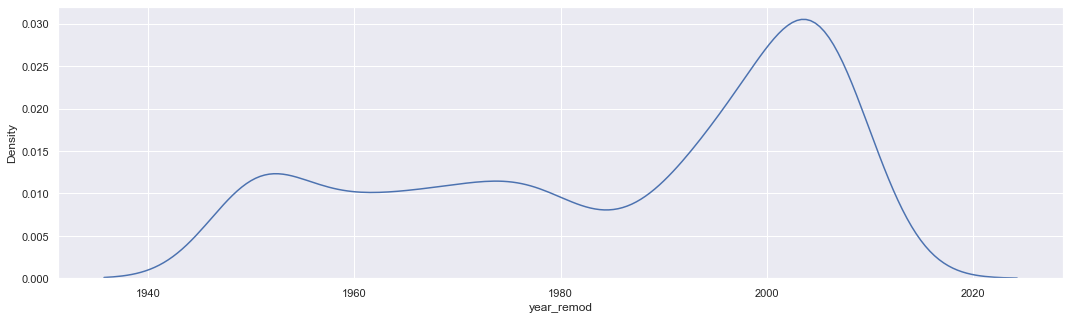

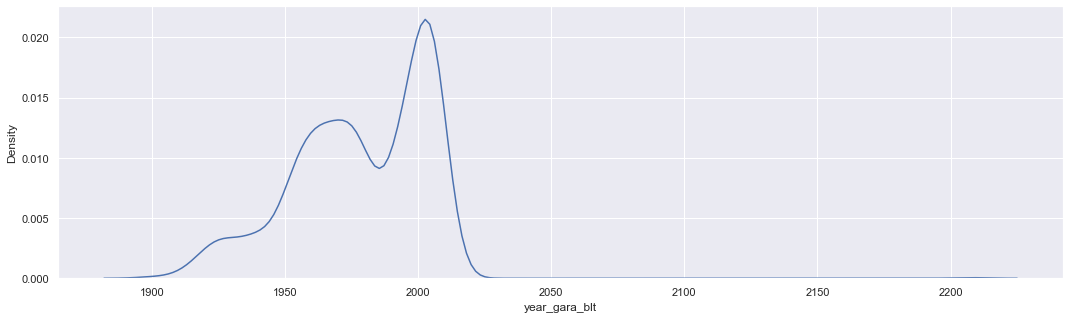

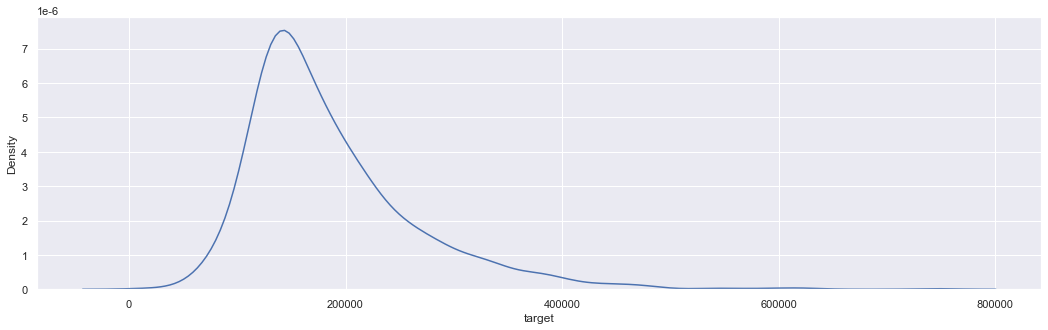

In [33]:
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()):
    sns.kdeplot(data=df, x=col)
    plt.show()

## correlation(without objective columns)

<AxesSubplot:>

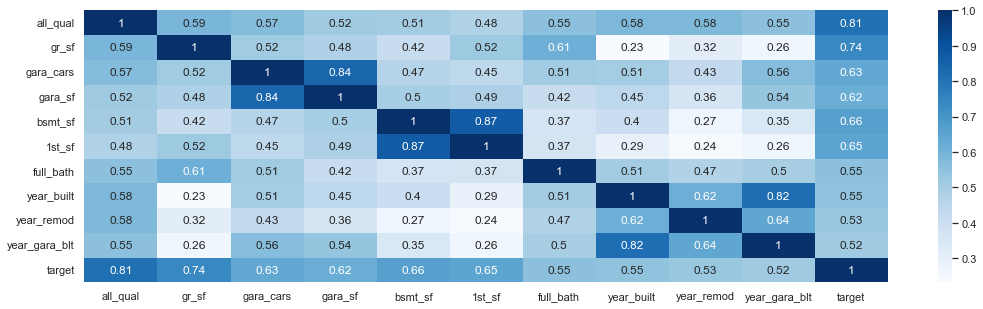

In [34]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)
# there is no negative correlation

<AxesSubplot:>

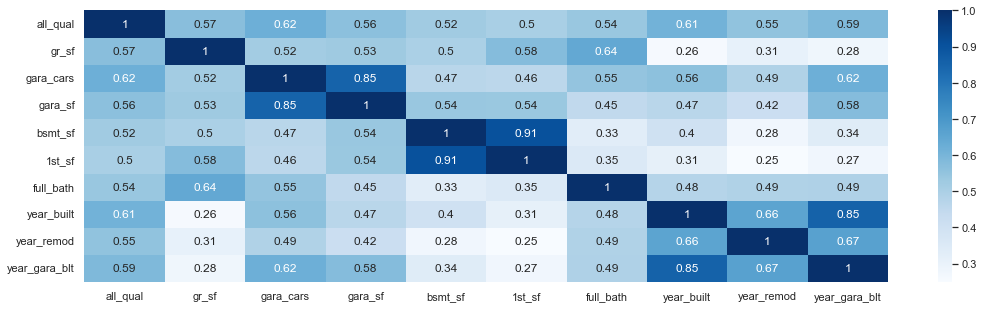

In [35]:
sns.heatmap(test.corr(), cmap='Blues', annot=True)

In [36]:
# data of test dataset is similarly distributed with train dataset's one
# but test dataset has more information about bsmt features

#### ToDo:   
**gara_sf vs gara_cars(0.84), gr_sf vs full bath(0.61), bsmt_sf vs 1st_sf(0.87), year_built vs year_gara_blt(0.82), year_built vs year_gara_blt(0.62), year remodvsyear_gara_blt(0.64)**

[without target]  
year_blt values  
_sf values  
gara_sf & gara_sf values

[with target]  
-> all_qual, ar_sf have the largest correlation

*******how to precess*******  
[_sf values]  
plan 1) just add up _sf values -> make total_sf feature  
plan 2) drop other values  
plan 3) give different weight (gr_sf, 1st_sf>bsmt_sf)  

[year_blt]  
??

## correlation(cross tab of objective features)

In [37]:
pd.crosstab(df['ex_qual'], df['kit_qual'])

kit_qual,Ex,Fa,Gd,TA
ex_qual,,,,
Ex,43,0,5,1
Fa,1,1,0,6
Gd,53,0,397,35
TA,10,22,158,618


In [38]:
pd.crosstab(df['bsmt_qual'], df['kit_qual'])

kit_qual,Ex,Fa,Gd,TA
bsmt_qual,,,,
Ex,71,0,53,10
Fa,2,2,2,22
Gd,24,2,384,172
Po,0,0,0,1
TA,10,19,121,455


In [39]:
pd.crosstab(df['ex_qual'], df['bsmt_qual'])

bsmt_qual,Ex,Fa,Gd,Po,TA
ex_qual,,,,,
Ex,43,0,5,0,1
Fa,0,1,1,0,6
Gd,82,2,358,0,43
TA,9,25,218,1,555


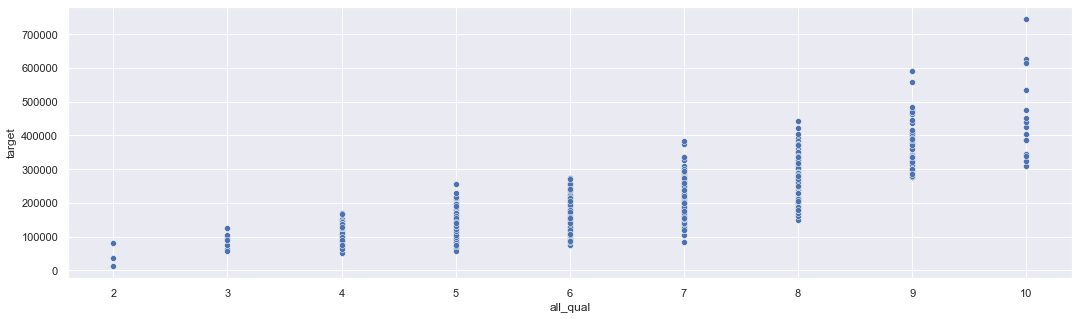

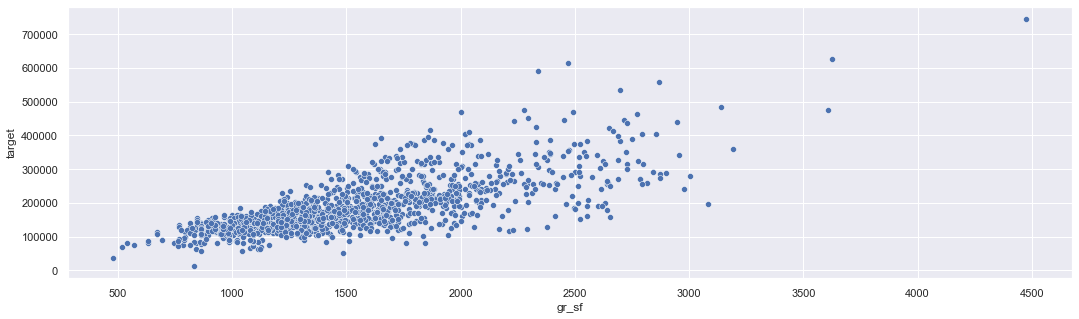

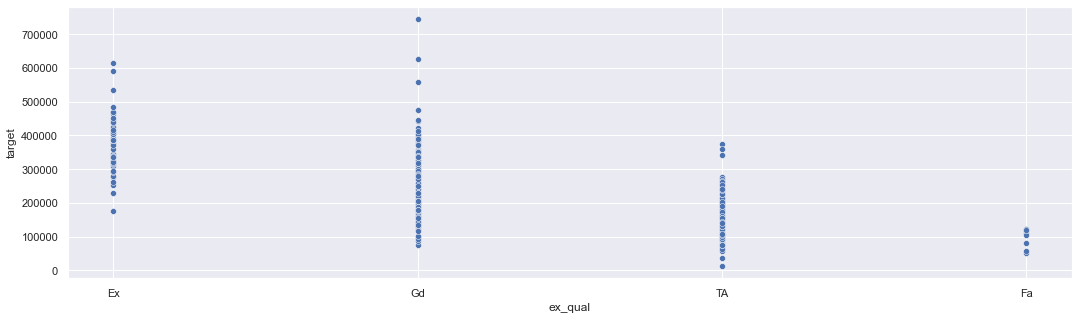

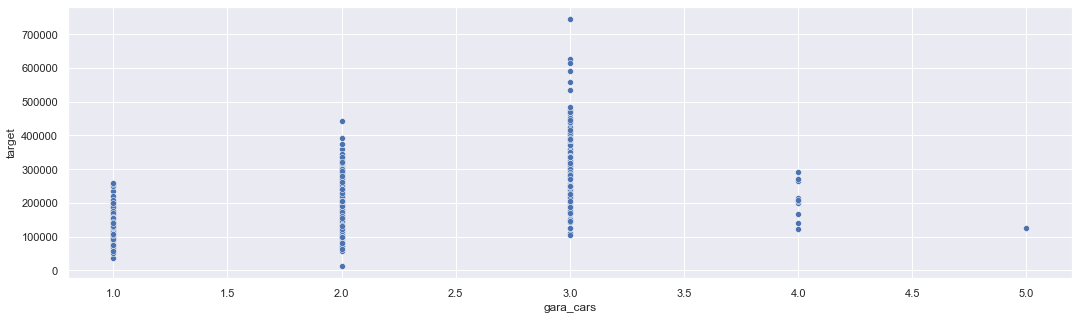

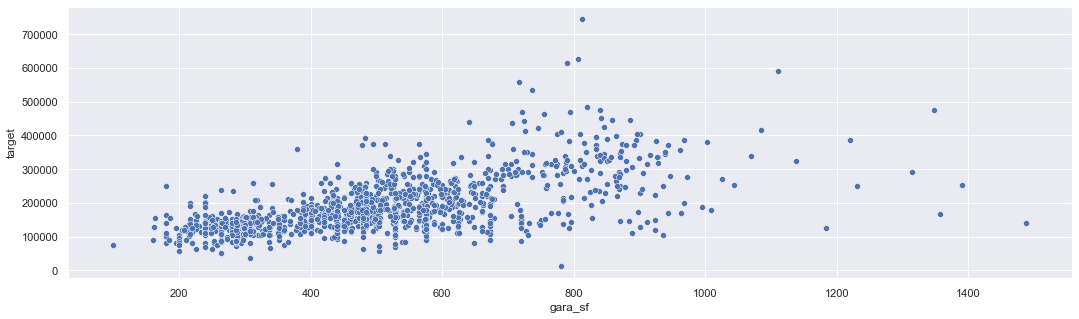

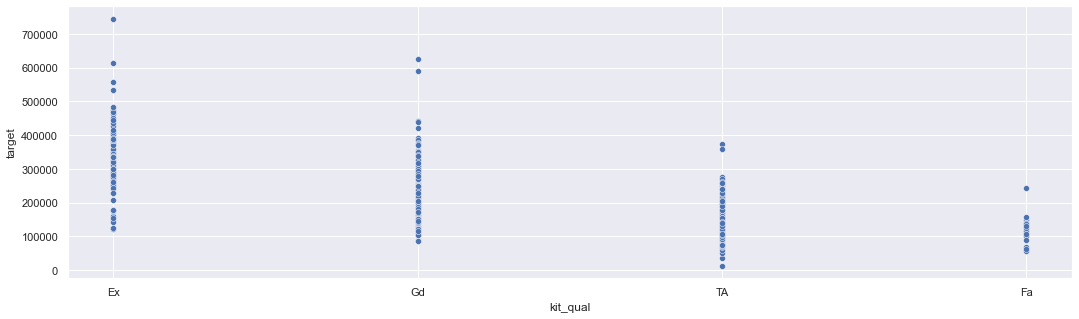

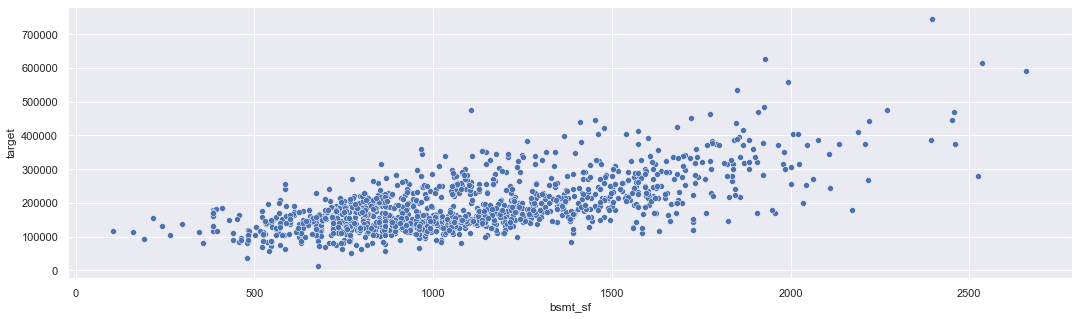

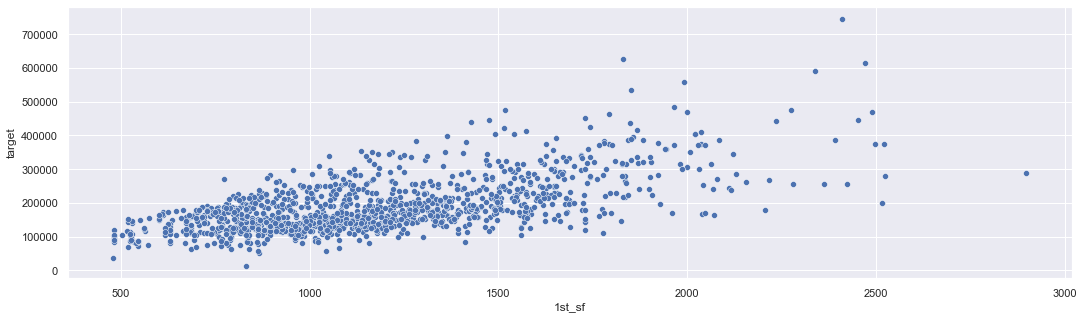

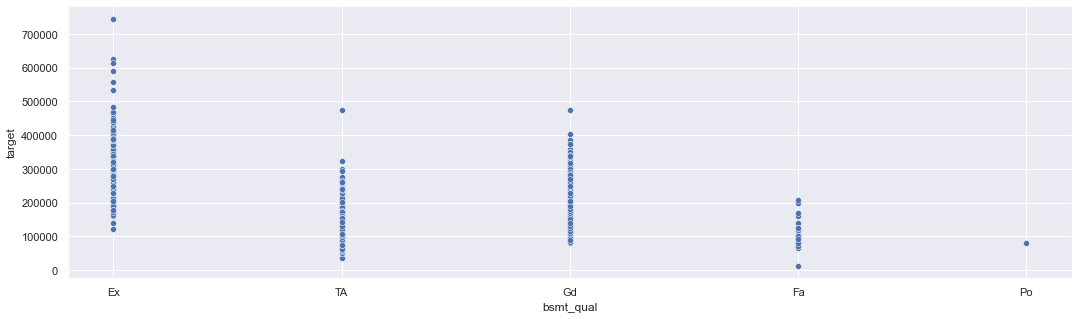

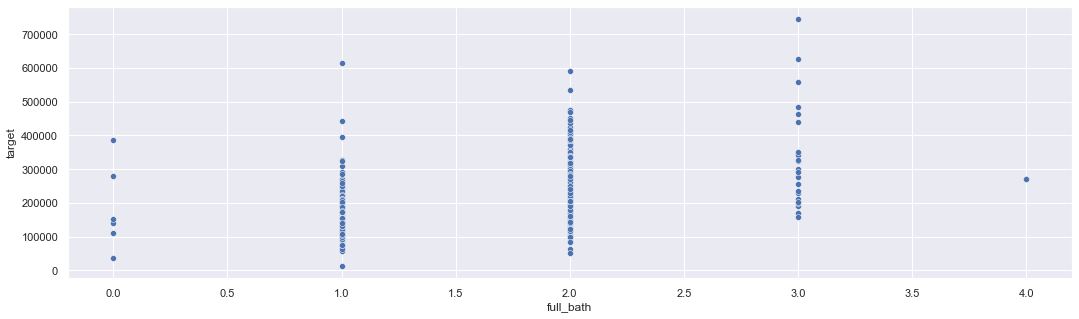

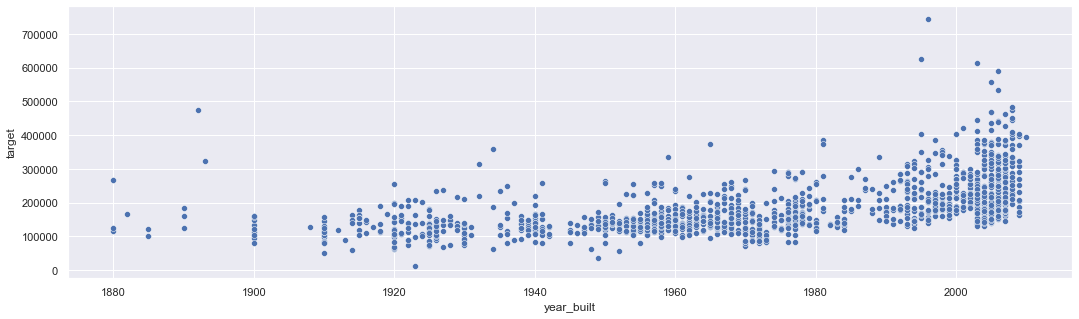

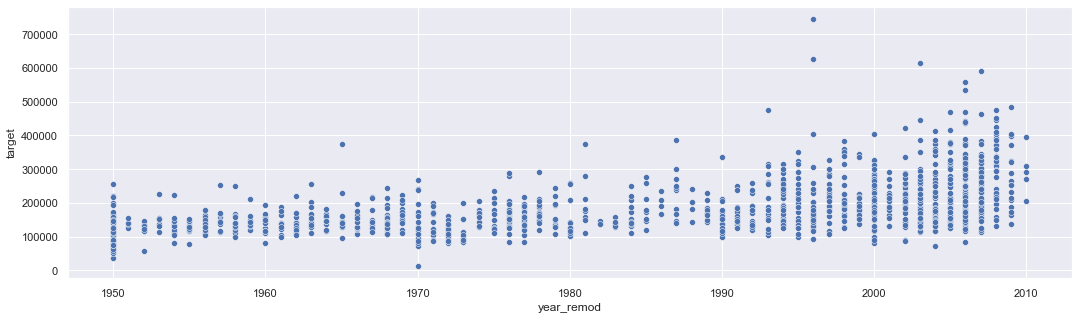

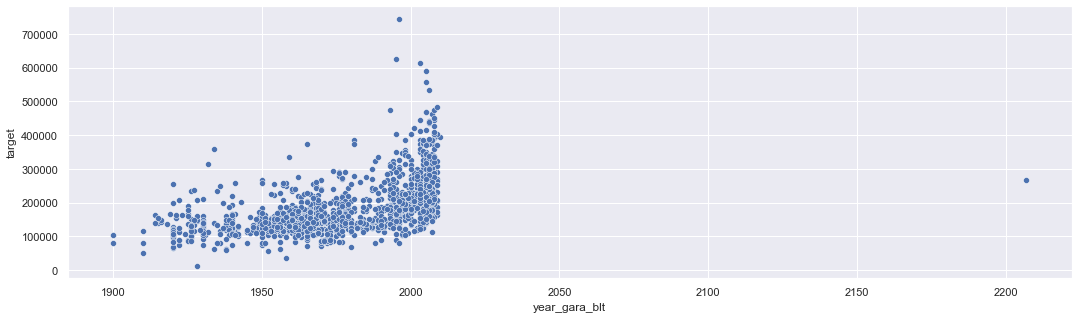

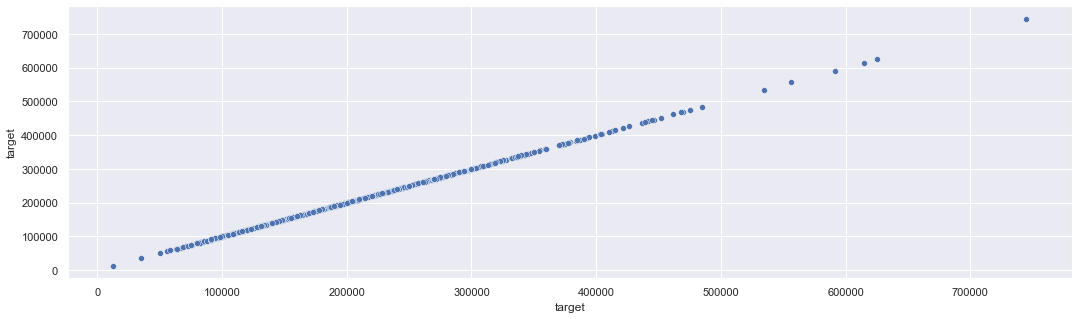

In [40]:
for col in df:
    sns.scatterplot(data=df, x=col, y="target")
    plt.show()

#### Todo: outlier : year_gara_blt -> 2007

# Processing

## object -> ordinal

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   all_qual       1350 non-null   int64 
 1   gr_sf          1350 non-null   int64 
 2   ex_qual        1350 non-null   object
 3   gara_cars      1350 non-null   int64 
 4   gara_sf        1350 non-null   int64 
 5   kit_qual       1350 non-null   object
 6   bsmt_sf        1350 non-null   int64 
 7   1st_sf         1350 non-null   int64 
 8   bsmt_qual      1350 non-null   object
 9   full_bath      1350 non-null   int64 
 10  year_built     1350 non-null   int64 
 11  year_remod     1350 non-null   int64 
 12  year_gara_blt  1350 non-null   int64 
 13  target         1350 non-null   int64 
dtypes: int64(11), object(3)
memory usage: 147.8+ KB


In [42]:
df['ex_qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [43]:
df['bsmt_qual'].unique()

array(['Ex', 'TA', 'Gd', 'Fa', 'Po'], dtype=object)

In [44]:
df['kit_qual'].unique()

array(['Ex', 'Gd', 'TA', 'Fa'], dtype=object)

In [45]:
col_list=df.select_dtypes(include='object').columns.tolist()
for col in col_list:
    df[col]=df[col].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4,3,2,1,0])
    test[col]=test[col].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'],[4,3,2,1,0])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   all_qual       1350 non-null   int64
 1   gr_sf          1350 non-null   int64
 2   ex_qual        1350 non-null   int64
 3   gara_cars      1350 non-null   int64
 4   gara_sf        1350 non-null   int64
 5   kit_qual       1350 non-null   int64
 6   bsmt_sf        1350 non-null   int64
 7   1st_sf         1350 non-null   int64
 8   bsmt_qual      1350 non-null   int64
 9   full_bath      1350 non-null   int64
 10  year_built     1350 non-null   int64
 11  year_remod     1350 non-null   int64
 12  year_gara_blt  1350 non-null   int64
 13  target         1350 non-null   int64
dtypes: int64(14)
memory usage: 147.8 KB


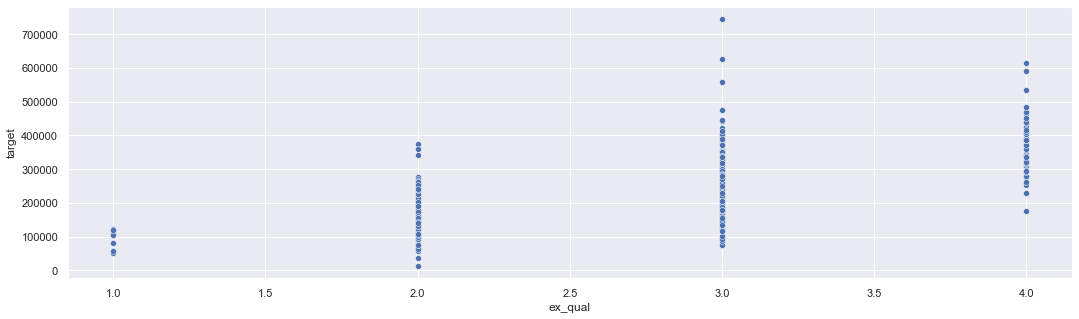

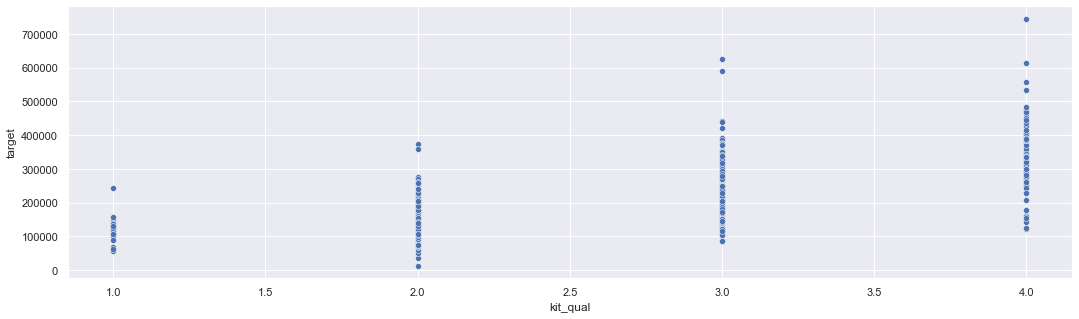

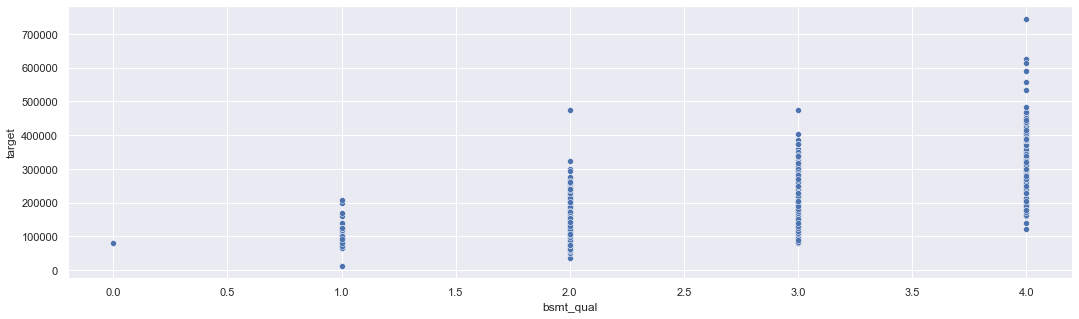

In [47]:
for col in col_list:
    sns.scatterplot(data=df, x=col, y="target")
    plt.show()

<AxesSubplot:>

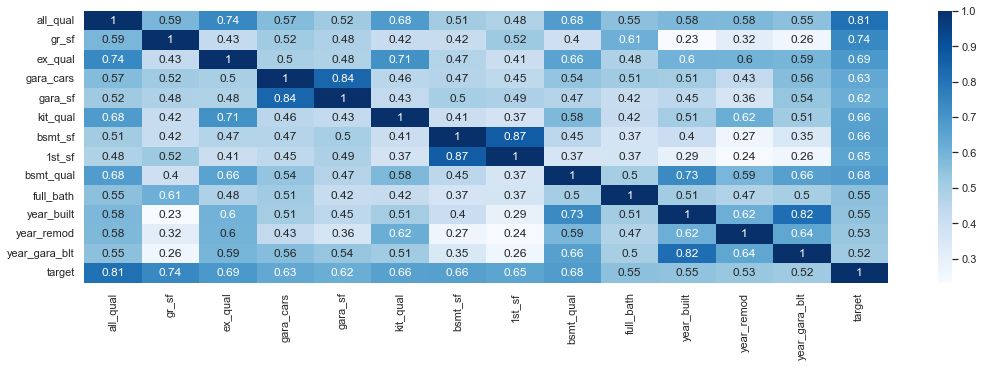

In [48]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

## feature processing

### outlier

In [49]:
df[df['year_gara_blt']==2207]

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target
254,8,1564,3,2,502,4,1546,1564,3,2,2006,2007,2207,267300


In [50]:
df['year_gara_blt']=df['year_gara_blt'].replace(2207, 2007)
df.loc[254, :]

all_qual              8
gr_sf              1564
ex_qual               3
gara_cars             2
gara_sf             502
kit_qual              4
bsmt_sf            1546
1st_sf             1564
bsmt_qual             3
full_bath             2
year_built         2006
year_remod         2007
year_gara_blt      2007
target           267300
Name: 254, dtype: int64

<AxesSubplot:xlabel='year_gara_blt', ylabel='target'>

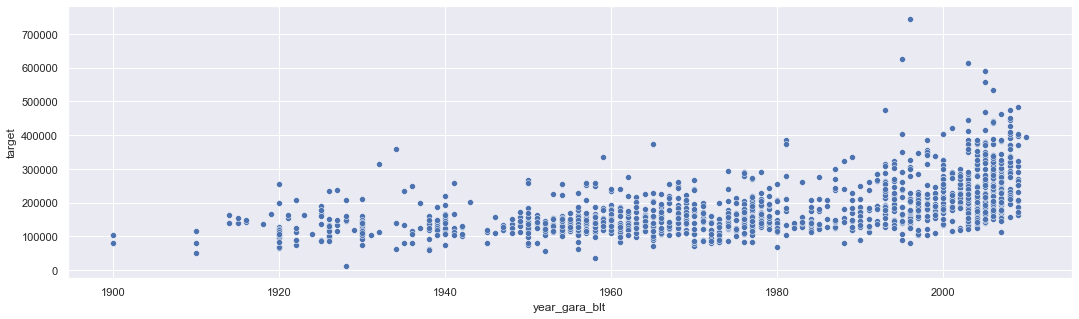

In [51]:
sns.scatterplot(data=df, x='year_gara_blt', y='target')

# fitting & evaluation

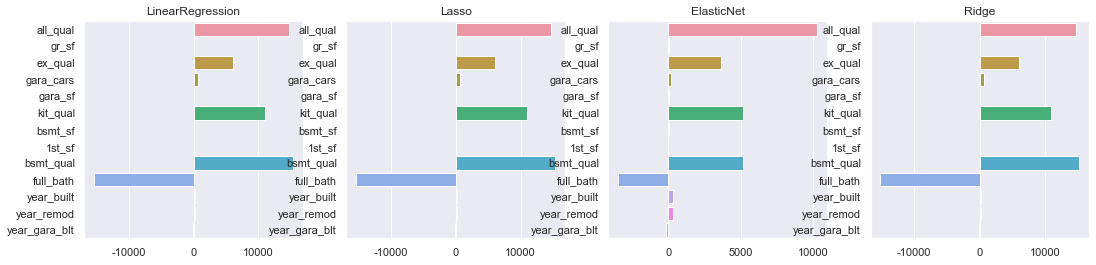

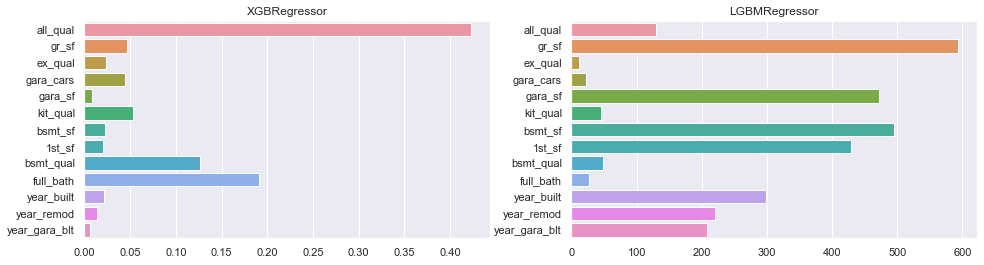

In [52]:
fit_score(df, 'pre_processing')

In [53]:
sco_df

,pre_processing
LinearRegression(),0.114679
Lasso(),0.114677
ElasticNet(),0.115463
Ridge(),0.114654
XGBRegressor(),0.105701
LGBMRegressor(),0.099447


# feature engineering

#### ToDo:   
**gara_sf vs gara_cars(0.84), gr_sf vs full bath(0.61), bsmt_sf vs 1st_sf(0.87), year_built vs year_gara_blt(0.82), year_built vs year_gara_blt(0.62), year remodvsyear_gara_blt(0.64)**

[without target]  
year_blt values  
_sf values  
gara_sf & gara_sf values

[with target]  
-> all_qual, ar_sf have the largest correlation

*******how to precess*******  
[_sf values]  
plan 1) just add up _sf values -> make total_sf feature  
plan 2) drop other values  
plan 3) give different weight (gr_sf, 1st_sf>bsmt_sf)  

[year_blt]  
??

## target -> log1p scaling

In [55]:
df['target']=np.log1p(df['target'])

,pre_processing,log target
LinearRegression(),0.114679,0.008513
Lasso(),0.114677,0.009977
ElasticNet(),0.115463,0.009631
Ridge(),0.114654,0.008512
XGBRegressor(),0.105701,0.008909
LGBMRegressor(),0.099447,0.008342


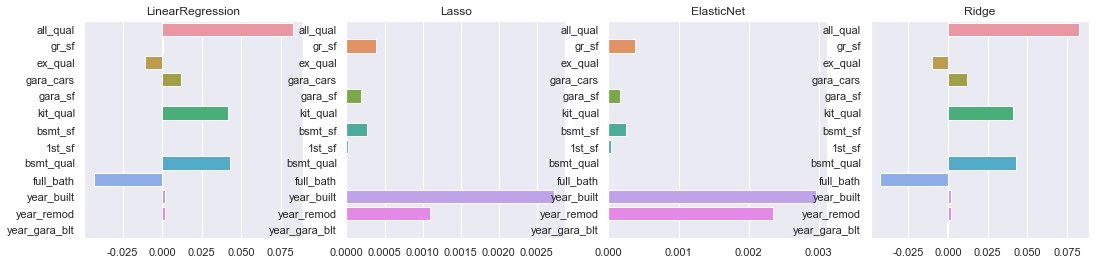

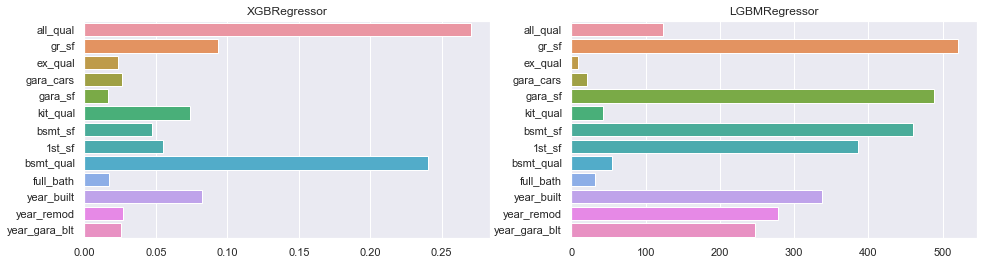

In [56]:
fit_score(df, 'log target')
sco_df

## _sf features

### plan 1) drop bsmt_sf

* drop bsmt_sf

In [57]:
df_t=df.copy()

In [58]:
df_t[['gr_sf', 'bsmt_sf', '1st_sf', 'gara_sf', 'full_bath']].corr()

,gr_sf,bsmt_sf,1st_sf,gara_sf,full_bath
gr_sf,1.000000,0.419220,0.522535,0.480863,0.612423
bsmt_sf,0.419220,1.000000,0.868811,0.499634,0.367648
1st_sf,0.522535,0.868811,1.000000,0.485843,0.370299
gara_sf,0.480863,0.499634,0.485843,1.000000,0.418852
full_bath,0.612423,0.367648,0.370299,0.418852,1.000000


In [59]:
df_t=df_t.drop(['bsmt_sf'], axis=1)

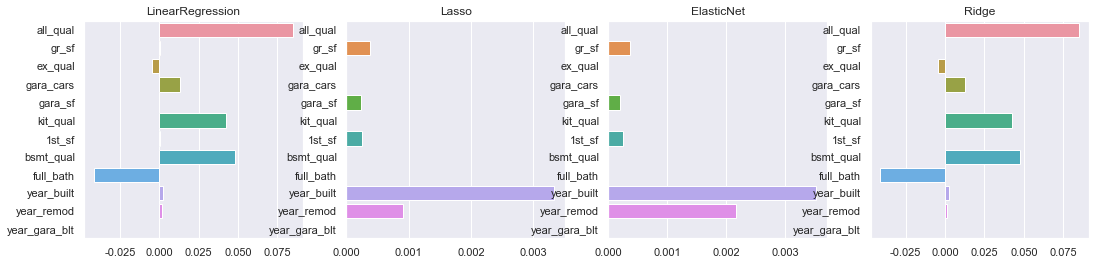

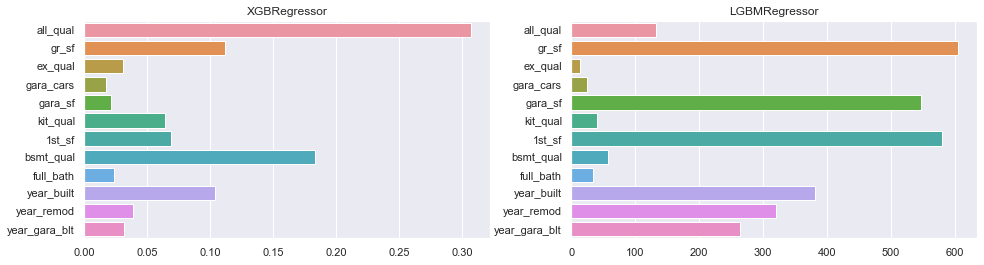

In [60]:
fit_score(df_t, 'drop_bsmt_sf')

In [61]:
sco_df

,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


### plan 2) mean feature

In [62]:
df_t=df.copy()

In [63]:
df_t['mean_floor_sf']=(df['gr_sf']+df['bsmt_sf']+df['1st_sf'])/3

In [64]:
df_t=df_t.drop(['gr_sf', 'bsmt_sf', '1st_sf'], axis=1)

LinearRegression()    0.009013
Lasso()               0.010987
ElasticNet()          0.010655
Ridge()               0.009011
XGBRegressor()        0.009328
LGBMRegressor()       0.008881
Name: mean_floor_sf, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


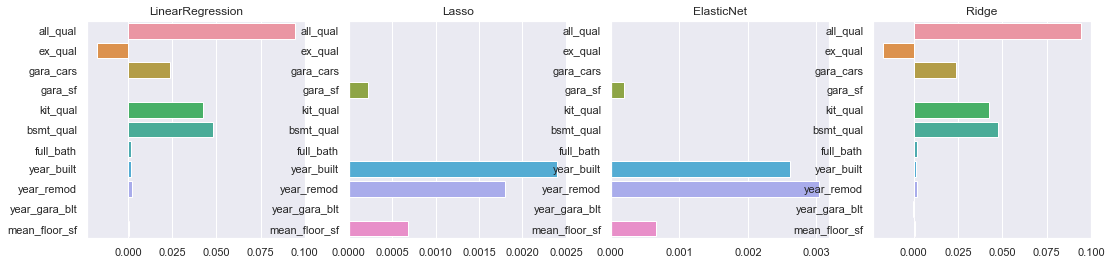

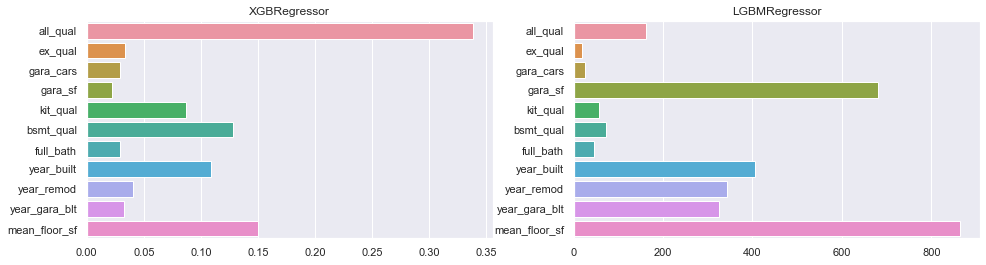

In [65]:
fit_score(df_t, 'mean_floor_sf', DF=False)
sco_df

### plan 3) give different weight

In [66]:
# df_t=df.copy()

In [68]:
# # bsmt_sf, 1st_sf -> mean
# df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
# df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [69]:
# # differently log scaling
# df_t['gr_sf']=np.log2(df_t['gr_sf'])
# df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
# df_t['gara_sf']=np.log10(df_t['gara_sf'])

LinearRegression()    0.008601
Lasso()               0.018271
ElasticNet()          0.018174
Ridge()               0.008598
XGBRegressor()        0.008869
LGBMRegressor()       0.008436
Name: diff_weight_sf, dtype: float64


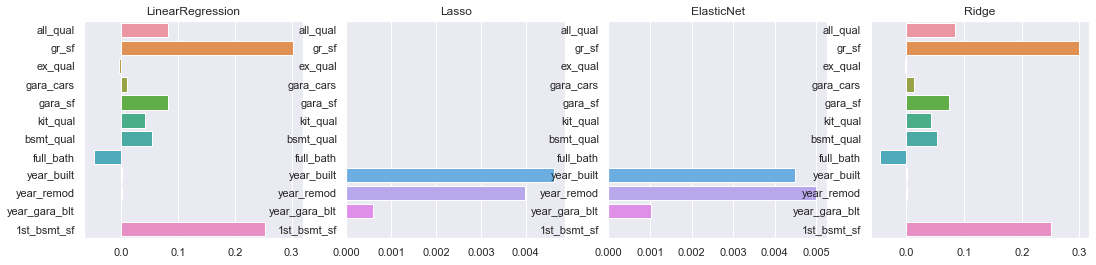

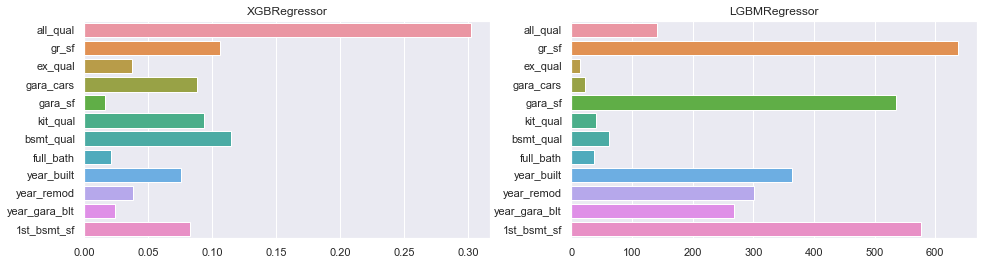

In [71]:
# fit_score(df_t, 'diff_weight_sf', DF=False)
# sco_df

In [ ]:
# sns.heatmap(df_t.corr(), cmap='Blues', annot=True)

## year

* plan 1) drop all year values --> mean sf
* plan 2) mean year values    --> mean sf
* plan 3) drop year_gara_blt  --> mean sf

### compare distributions of year values

In [ ]:
# var_color_dict = {'year_built': 'blue', 
#                       'year_remod': 'red', 
#                       'year_gara_blt': 'yellow'}

# for var in var_color_dict:
#     sns.distplot(df[var],                  
#                     color = var_color_dict[var], 
#                     hist_kws = {'edgecolor': 'gray'}, 
#                     label = var)

# plt.legend(title = 'Variables')
# plt.show()

### year vs qual

In [ ]:
# f, axs = plt.subplots(3,4, figsize=(25,12))

# year_list=['year_built','year_remod','year_gara_blt']
# qual_list=['all_qual','ex_qual','kit_qual', 'bsmt_qual']

# for j, year in enumerate(year_list):
#     for i, qual in enumerate(qual_list):
#         sns.histplot(data=df, x=year, hue=qual, ax=axs[j,i], binrange=(1875,2020))


### plan 1) drop all year values

In [78]:
# df_t=df.copy()

In [79]:
# df_t=df_t.drop(['year_built','year_remod','year_gara_blt'], axis=1)

In [80]:
# fit_score(df_t, 'drop_years', DF=False)
# sco_df

### plan 1-2) drop all year values -> diffrent weight sf

In [81]:
# # bsmt_sf, 1st_sf -> mean
# df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
# df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [82]:
# # differently log scaling
# df_t['gr_sf']=np.log2(df_t['gr_sf'])
# df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
# df_t['gara_sf']=np.log10(df_t['gara_sf'])

In [83]:
# fit_score(df_t, 'drop_years&diff_weight_sf', DF=False)
# sco_df

### plan2) mean year values

In [84]:
df_t=df.copy()

In [85]:
df_t['mean_year']=(df_t['year_built']+df_t['year_remod']+df_t['year_gara_blt'])/3
df_t['mean_year']=np.round(df_t['mean_year'])

In [86]:
year_list=['year_built','year_remod','year_gara_blt']
df_t=df_t.drop(year_list, axis=1)
df_t.head()

,all_qual,gr_sf,ex_qual,gara_cars,gara_sf,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,target,mean_year
0,10,2392,4,3,968,4,2392,2392,4,2,12.864243,2003.0
1,7,1352,3,2,466,3,1352,1352,4,2,12.175619,2006.0
2,5,900,2,1,288,2,864,900,2,1,11.719948,1967.0
3,5,1174,2,2,576,3,680,680,2,1,11.813037,1969.0
4,7,1958,3,3,936,3,1026,1026,3,2,12.429220,2005.0


LinearRegression()    0.008589
Lasso()               0.010114
ElasticNet()          0.009829
Ridge()               0.008587
XGBRegressor()        0.008992
LGBMRegressor()       0.008588
Name: mean_year, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


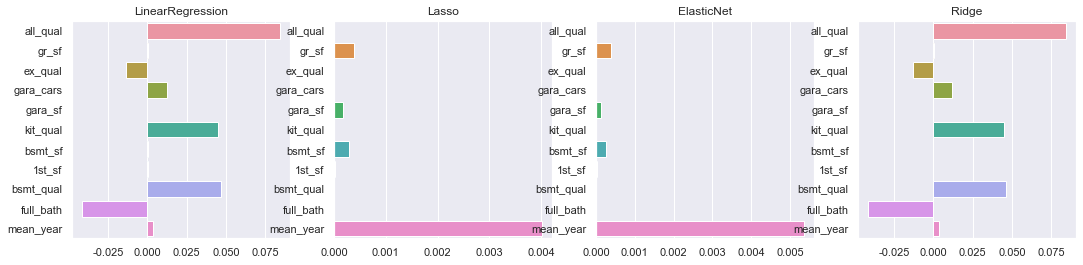

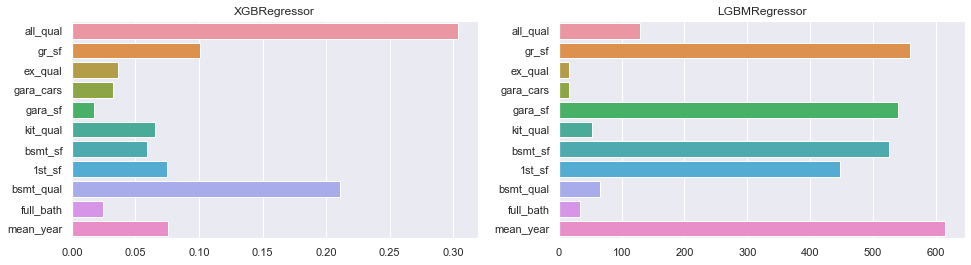

In [87]:
fit_score(df_t, 'mean_year', DF=False)
sco_df

### plan 2-2) mean year values -> diffrent weight sf

In [88]:
# # bsmt_sf, 1st_sf -> mean
# df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
# df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [89]:
# # differently log scaling
# df_t['gr_sf']=np.log2(df_t['gr_sf'])
# df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
# df_t['gara_sf']=np.log10(df_t['gara_sf'])

LinearRegression()    0.008674
Lasso()               0.018442
ElasticNet()          0.018346
Ridge()               0.008673
XGBRegressor()        0.008981
LGBMRegressor()       0.008544
Name: mean_years&diff_weight_sf, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


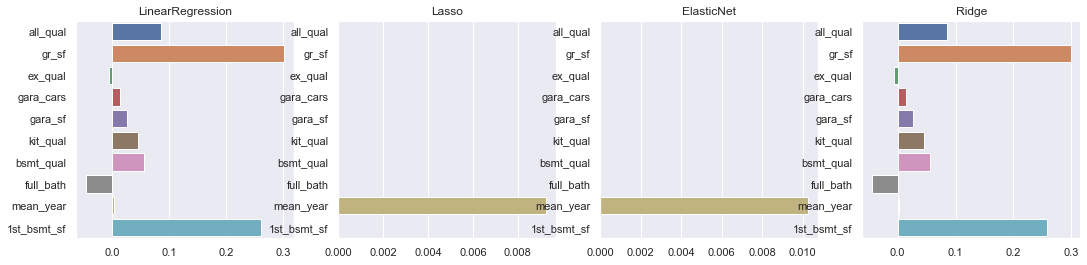

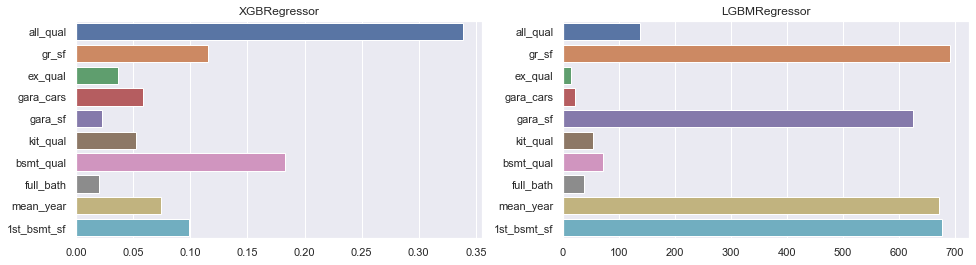

In [90]:
# fit_score(df_t, 'mean_years&diff_weight_sf', DF=False)
# sco_df

### plan 3) drop year_gara_blt

In [103]:
df_t=df.copy()

In [104]:
df_t=df_t.drop(['year_gara_blt'], axis=1)

LinearRegression()    0.008496
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008495
XGBRegressor()        0.008827
LGBMRegressor()       0.008395
Name: drop_gara_years, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


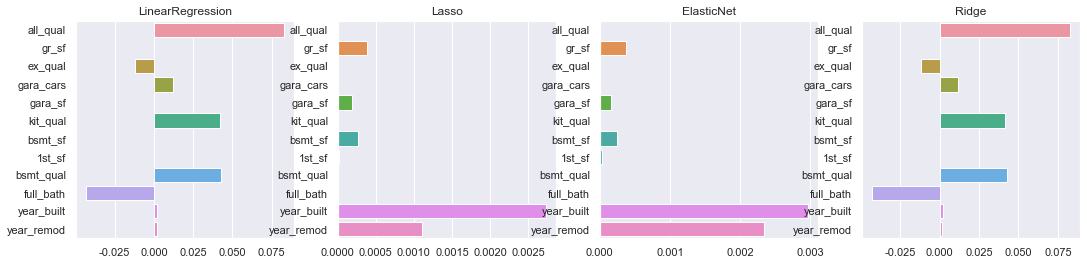

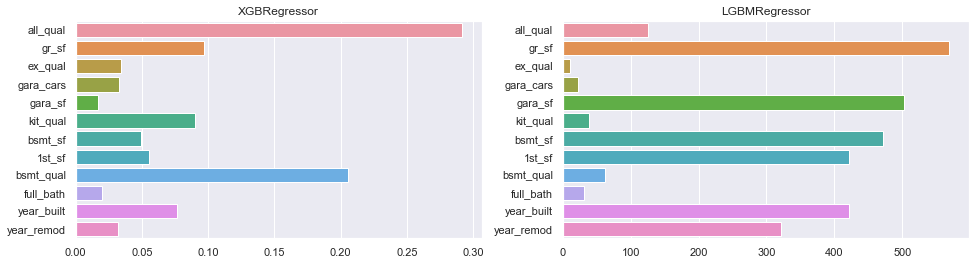

In [105]:
fit_score(df_t, 'drop_gara_years', DF=False)
sco_df

### plan 3-2) drop gara year values -> diffrent weight sf

In [100]:
# # bsmt_sf, 1st_sf -> mean
# df_t['1st_bsmt_sf']=(df_t['bsmt_sf']+df_t['1st_sf'])/2
# df_t=df_t.drop(['bsmt_sf', '1st_sf'], axis=1)

In [101]:
# # differently log scaling
# df_t['gr_sf']=np.log2(df_t['gr_sf'])
# df_t['1st_bsmt_sf']=np.log(df_t['1st_bsmt_sf'])
# df_t['gara_sf']=np.log10(df_t['gara_sf'])

In [102]:
# fit_score(df_t, 'drop_gara_years&diff_weight_sf', DF=False)
# sco_df

### plan 3-3) drop gara year values -> drop bsmt_sf

In [106]:
df_t=df_t.drop('bsmt_sf', axis=1)

LinearRegression()    0.008603
Lasso()               0.010260
ElasticNet()          0.009938
Ridge()               0.008602
XGBRegressor()        0.008905
LGBMRegressor()       0.008476
Name: drop_gara_years&drop_bsmt_sf, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


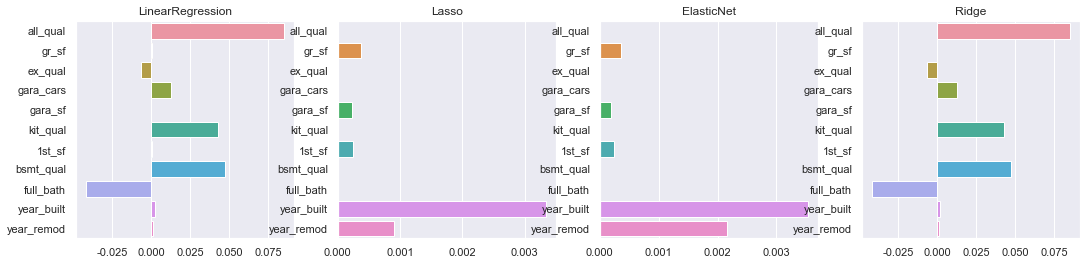

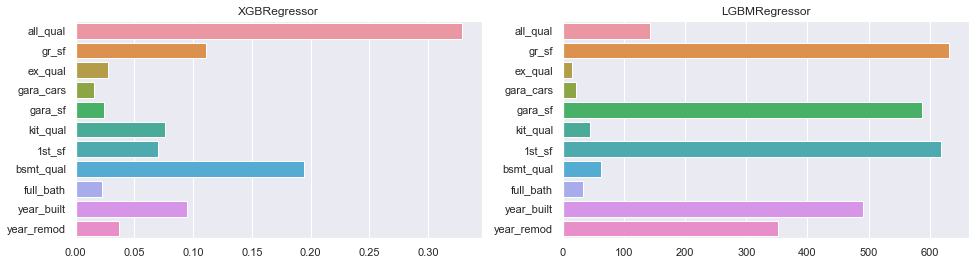

In [107]:
fit_score(df_t, 'drop_gara_years&drop_bsmt_sf', DF=False)
sco_df

## qual

* plan 1) drop all qual columns without all_qual
* plan 2) mean all qual columns

In [108]:
qual_list=['all_qual','ex_qual','kit_qual', 'bsmt_qual']

for qual in qual_list[1:]:
    print(pd.crosstab(df['all_qual'], df[qual]))


ex_qual   1    2    3   4
all_qual                 
2         0    3    0   0
3         0    7    1   0
4         3   70    2   0
5         4  355   20   0
6         1  285   64   1
7         0   84  223   0
8         0    3  147   6
9         0    1   25  30
10        0    0    3  12
kit_qual   1    2    3   4
all_qual                  
2          0    3    0   0
3          2    6    0   0
4          6   59   10   0
5         10  302   61   6
6          5  226  115   5
7          0   61  236  10
8          0    3  128  25
9          0    0    7  49
10         0    0    3  12
bsmt_qual  0   1    2    3   4
all_qual                      
2          0   1    2    0   0
3          0   1    7    0   0
4          1   6   58   10   0
5          0  12  292   74   1
6          0   7  187  148   9
7          0   1   52  237  17
8          0   0    5  107  44
9          0   0    0    5  51
10         0   0    2    1  12


### plan 1) drop all qual columns without all_qual

In [109]:
df_t=df.copy()

In [110]:
df_t=df_t.drop(['ex_qual','kit_qual', 'bsmt_qual'], axis=1)

LinearRegression()    0.008646
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008645
XGBRegressor()        0.008993
LGBMRegressor()       0.008519
Name: drop_qual_col_wo_all, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


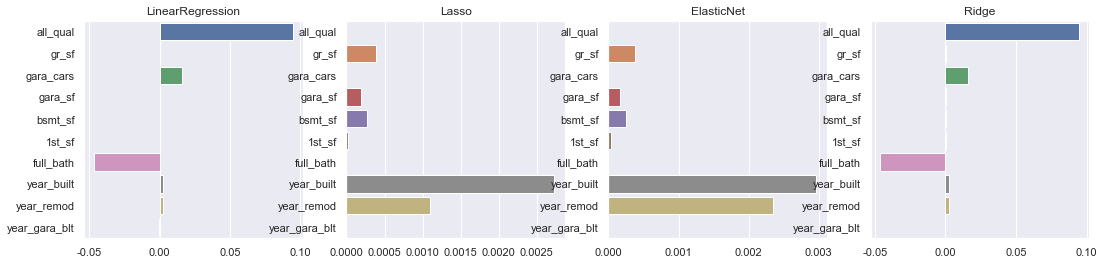

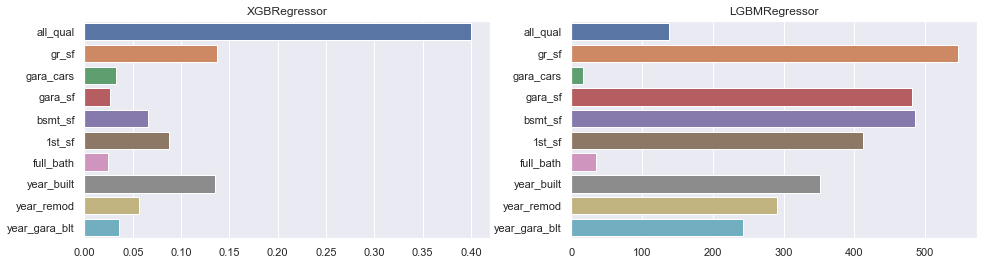

In [111]:
fit_score(df_t, 'drop_qual_col_wo_all', DF=False)
sco_df

### plan 2) mean all qual columns

In [124]:
df_t=df.copy()

In [125]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4

In [126]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

LinearRegression()    0.008576
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008573
XGBRegressor()        0.008891
LGBMRegressor()       0.008430
Name: mean_qual, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


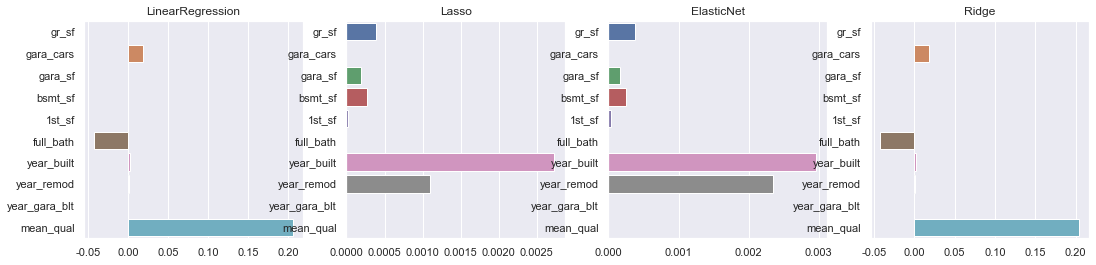

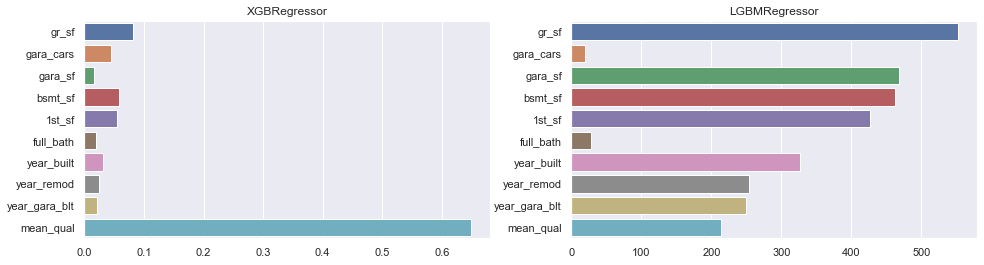

In [127]:
fit_score(df_t, 'mean_qual', DF=False)
sco_df

### plan 2-2) mean all qual columns -> drop gara year

In [128]:
df_t=df_t.drop('year_gara_blt', axis=1)

LinearRegression()    0.008584
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008580
XGBRegressor()        0.008902
LGBMRegressor()       0.008409
Name: mean_qual&drop_gara_year, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


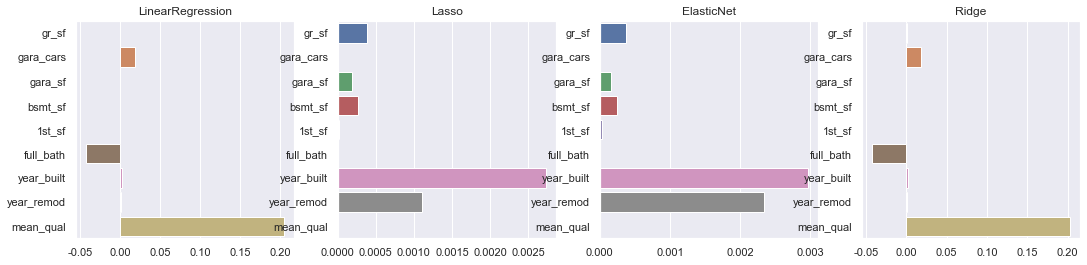

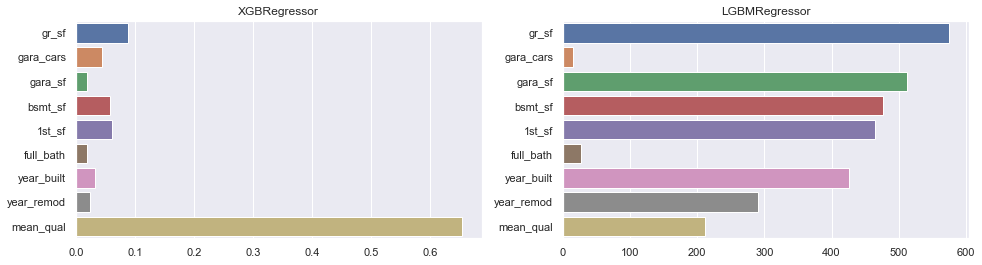

In [129]:
fit_score(df_t, 'mean_qual&drop_gara_year', DF=False)
sco_df

### plan 2-3) mean all qual columns -> drop gara year -> mean_sf

In [121]:
# df_t['mean_floor_sf']=(df['gr_sf']+df['bsmt_sf']+df['1st_sf'])/3

In [122]:
# df_t=df_t.drop(['gr_sf', 'bsmt_sf', '1st_sf'], axis=1)

In [123]:
# fit_score(df_t, 'mean_qual&drop_gara_year&mean_floor_sf', DF=False)
# sco_df

### plan 2-3) mean all qual columns -> drop gara year -> drop bsmt_sf

In [131]:
# df_t=df_t.drop(['bsmt_sf'], axis=1)

In [133]:
# fit_score(df_t, 'mean_qual&drop_gara_year&drop_bsmt_sf', DF=False)
# sco_df

### plan 3) mean all qual columns + full bath

In [167]:
df_t=df.copy()

In [168]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual']+df_t['full_bath'])/5

In [169]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual', 'full_bath'], axis=1)

LinearRegression()    0.008806
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008801
XGBRegressor()        0.008931
LGBMRegressor()       0.008511
Name: mean_qual, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


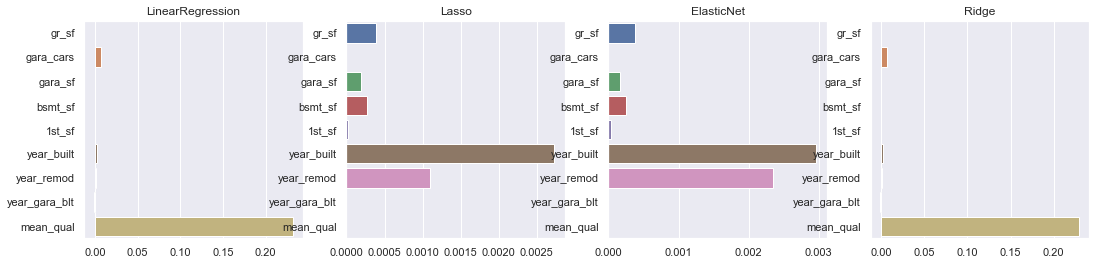

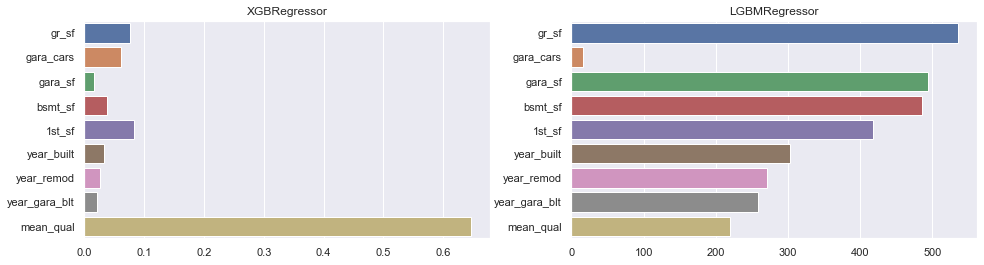

In [170]:
fit_score(df_t, 'mean_qual', DF=False)
sco_df

## gara_sf & gara_cars

* Plan 1: drop gara_sf
* Plan 2: drop gara_cars
* Plan 3: gara_sf/gara_cars

<AxesSubplot:xlabel='gara_sf', ylabel='Count'>

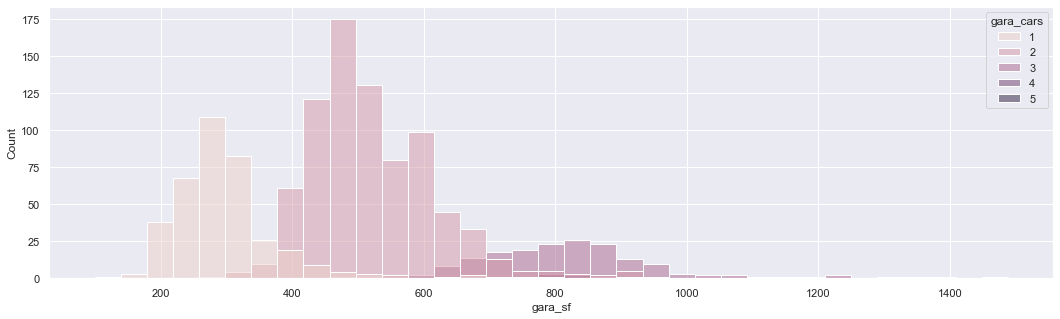

In [135]:
sns.histplot(data=df, x='gara_sf', hue='gara_cars')

### Plan 1: drop gara_sf

In [136]:
# df_t=df.copy()

In [137]:
# df_t=df.drop('gara_sf',axis=1)

LinearRegression()    0.008543
Lasso()               0.010187
ElasticNet()          0.009826
Ridge()               0.008543
XGBRegressor()        0.009016
LGBMRegressor()       0.008614
Name: drop_gara_sf, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


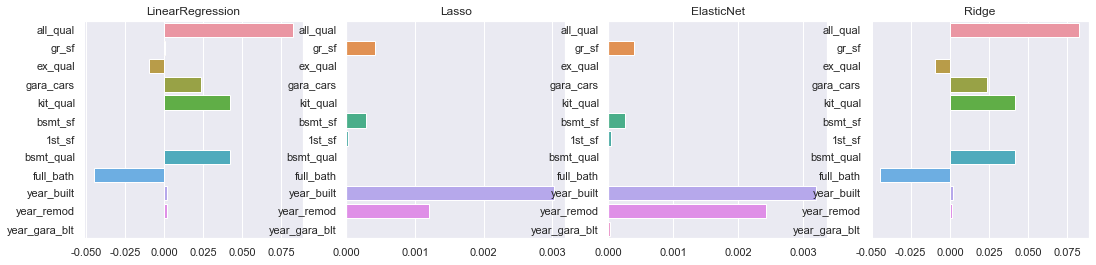

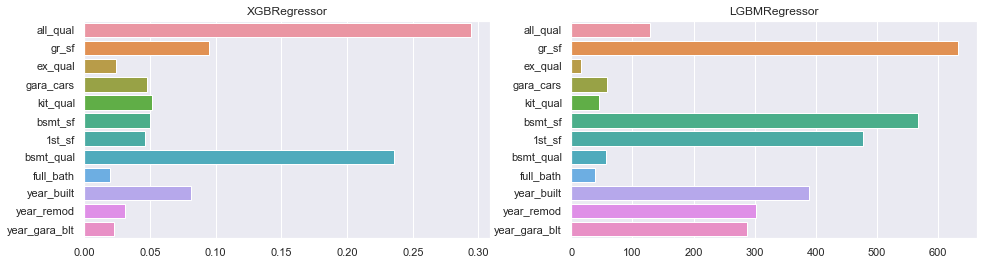

In [138]:
# fit_score(df_t, 'drop_gara_sf', DF=False)
# sco_df

### Plan 2: drop gara_cars

In [139]:
df_t=df.copy()

In [140]:
df_t=df.drop('gara_cars',axis=1)

LinearRegression()    0.008512
Lasso()               0.009977
ElasticNet()          0.009631
Ridge()               0.008511
XGBRegressor()        0.008893
LGBMRegressor()       0.008349
Name: drop_gara_cars, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


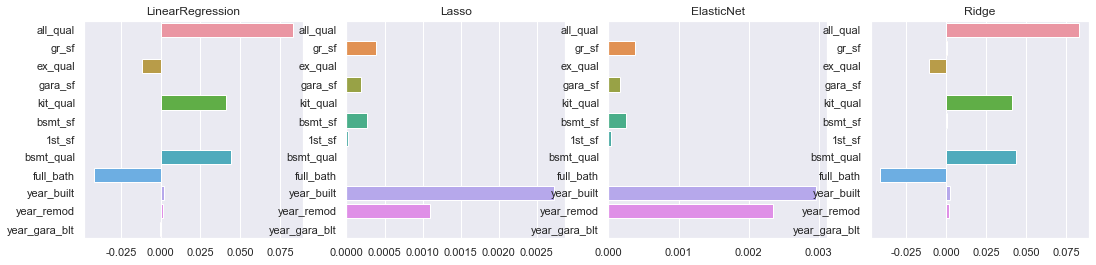

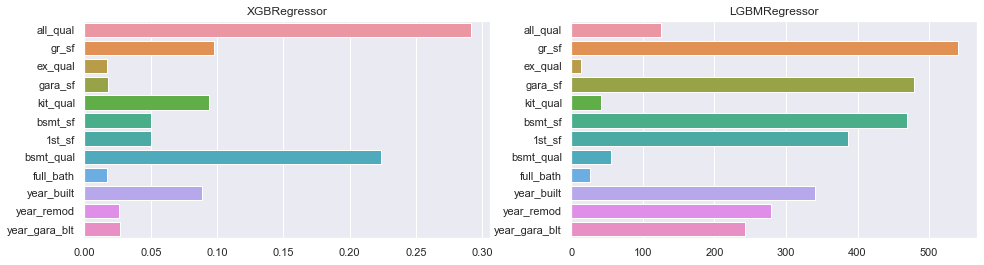

In [141]:
fit_score(df_t, 'drop_gara_cars', DF=False)
sco_df

### Plan 3: gara_sf/gara_cars

In [164]:
df_t=df.copy()

In [165]:
df_t['gara_ratio']=(df_t['gara_sf']/df_t['gara_cars'])
df_t=df_t.drop(['gara_sf','gara_cars'],axis=1)

,all_qual,gr_sf,ex_qual,kit_qual,bsmt_sf,1st_sf,bsmt_qual,full_bath,year_built,year_remod,year_gara_blt,target,gara_ratio
0,10,2392,4,4,2392,2392,4,2,2003,2003,2003,12.864243,322.666667
1,7,1352,3,3,1352,1352,4,2,2006,2007,2006,12.175619,233.000000
2,5,900,2,2,864,900,2,1,1967,1967,1967,11.719948,288.000000
3,5,1174,2,3,680,680,2,1,1900,2006,2000,11.813037,288.000000
4,7,1958,3,3,1026,1026,3,2,2005,2005,2005,12.429220,312.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1345,6,1756,3,2,872,888,4,2,1996,1997,1996,12.225880,211.000000
1346,9,2748,3,4,1850,1850,4,2,2006,2006,2006,12.873905,283.333333
1347,5,1214,2,2,1214,1214,2,2,1967,1967,1967,11.870607,318.000000
1348,5,894,2,2,864,894,3,1,1974,1974,1974,11.782960,220.000000


LinearRegression()    0.008595
Lasso()               0.010187
ElasticNet()          0.009826
Ridge()               0.008594
XGBRegressor()        0.008877
LGBMRegressor()       0.008495
Name: gara_ratio, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


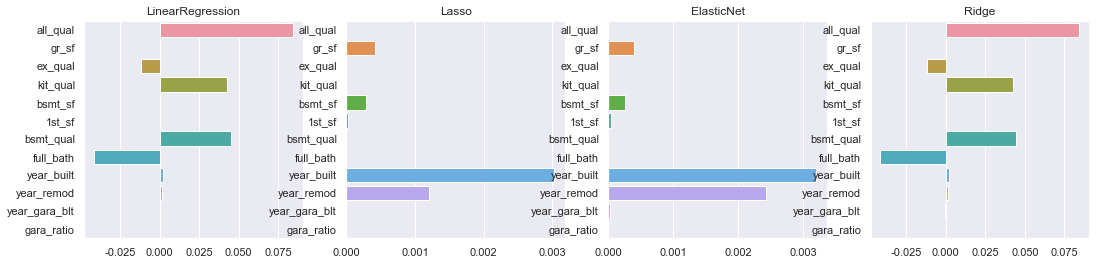

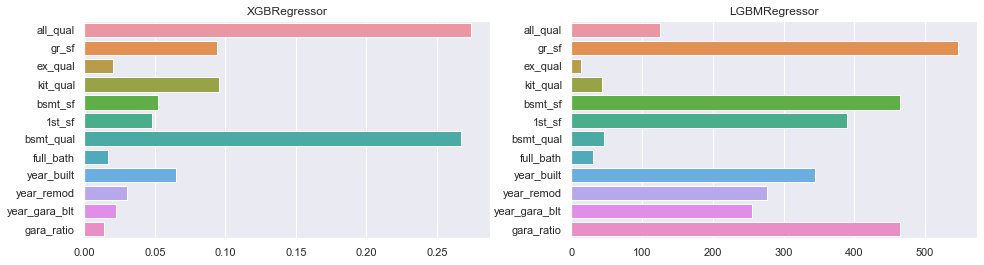

In [166]:
fit_score(df_t, 'gara_ratio', DF=False)
sco_df

### -> drop[gara_year], mean_qual

In [ ]:
df_t=df_t.drop(['year_gara_blt'], axis=1)

In [ ]:
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4

In [ ]:
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

In [ ]:
fit_score(df_t, 'drop_gara_sf&drop_gara_year&mean_qual', DF=False)
sco_df

## full_bath

# Third trial

In [210]:
df_t=df.copy()

In [211]:
# year
df_t=df_t.drop(['year_gara_blt'], axis=1)

In [212]:
# qual
df_t['mean_qual']=(df_t['all_qual']+df_t['ex_qual']+df_t['kit_qual']+df_t['bsmt_qual'])/4
df_t=df_t.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

In [213]:
df_t=df_t.drop(['gara_cars', 'full_bath', 'bsmt_sf'], axis=1)

In [174]:
# gara_sf&gara_cars
# df_t['gara_ratio']=(df_t['gara_sf']/df_t['gara_cars'])
# df_t=df_t.drop(['gara_sf','gara_cars'],axis=1)

In [214]:
# differently log scaling
df_t['gr_sf']=np.log2(df_t['gr_sf'])
df_t['1st_sf']=np.log(df_t['1st_sf'])
df_t['gara_sf']=np.log10(df_t['gara_sf'])

LinearRegression()    0.008885
Lasso()               0.018288
ElasticNet()          0.018187
Ridge()               0.008887
XGBRegressor()        0.008931
LGBMRegressor()       0.008521
Name: drop_gara_year&mean_qual, dtype: float64


,pre_processing,log target,drop_bsmt_sf
LinearRegression(),0.114679,0.008513,0.008609
Lasso(),0.114677,0.009977,0.010260
ElasticNet(),0.115463,0.009631,0.009938
Ridge(),0.114654,0.008512,0.008608
XGBRegressor(),0.105701,0.008909,0.008921
LGBMRegressor(),0.099447,0.008342,0.008557


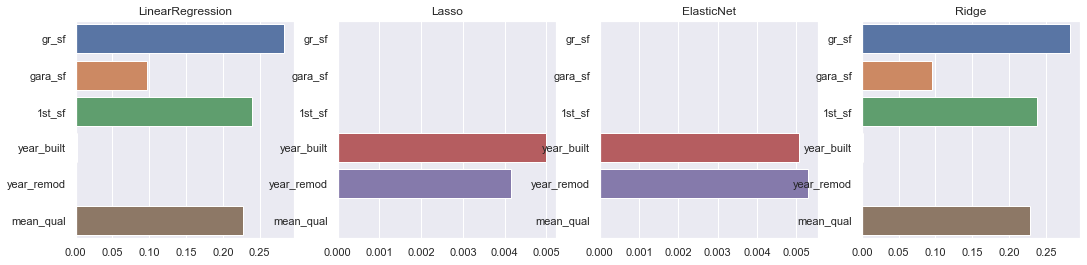

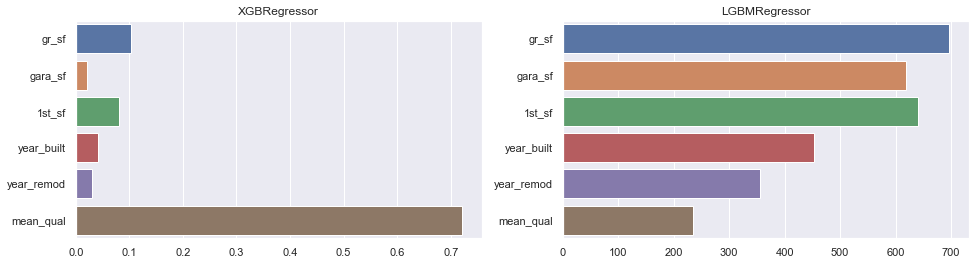

In [215]:
fit_score(df_t, 'drop_gara_year&mean_qual', DF=False)
sco_df

# Grid Search CV

In [229]:
NMAE_score = make_scorer(NMAE, greater_is_better = False)


y = df_t['target']
X = df_t.drop(['target'], axis=1)
X_train,X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size=0.2,
                                                   random_state=1024,
                                                   shuffle=True
                                                      )

model = LGBMRegressor(random_state=1024)
#-- 튜닝 : 하이퍼파라미터 값을 임의로 변경해서 모델의 성능을 좋게 한다.
myparam = {'learning_rate': [0.05, 0.1, 0.2],
           'reg_lambda': [0.7, 0.8, 0.9, 1],
           'n_estimators' : [40, 45, 50, 55]
        }

kfold = KFold(n_splits=10, shuffle=True, random_state=1024) 
gcv_model = GridSearchCV(model, param_grid=myparam, scoring=NMAE_score, refit=True, cv=kfold)


gcv_model.fit(X_train, y_train)
print(gcv_model.best_score_)
print(gcv_model.best_params_)
# print(gcv_model.cv_results_)



-0.008195621498504396
{'learning_rate': 0.1, 'n_estimators': 45, 'reg_lambda': 1}


In [230]:
pred=gcv_model.predict(X_test)
NMAE(y_test, pred)


0.00872016486497663

# Submission

In [231]:
test=test.drop(['year_gara_blt'], axis=1)

KeyError: "['year_gara_blt'] not found in axis"

In [217]:
test['mean_qual']=(test['all_qual']+test['ex_qual']+test['kit_qual']+test['bsmt_qual'])/4

In [218]:
test=test.drop(['all_qual','ex_qual','kit_qual', 'bsmt_qual'], axis=1)

In [220]:
test=test.drop(['gara_cars', 'full_bath', 'bsmt_sf'], axis=1)

In [221]:
# differently log scaling
test['gr_sf']=np.log2(test['gr_sf'])
test['1st_sf']=np.log(test['1st_sf'])
test['gara_sf']=np.log10(test['gara_sf'])

In [232]:
pred=gcv_model.predict(test)

In [233]:
sub['target']=np.expm1(pred)

In [234]:
sub.head()

,id,target
0,1,322299.777323
1,2,128078.646216
2,3,176846.955712
3,4,266419.442887
4,5,126760.509256


In [235]:
sub.to_csv('./dataset/housing_submission2.csv', index=False)